# Consumo de APIs REST

Las [APIs](https://en.wikipedia.org/wiki/Application_programming_interface) (Application Programming Interface) se utilizan de manera habitual para acceder a datos, servicios o facilitar la comunicación entre programas.

Son muy útiles en los siguientes casos:

* Los datos cambian rápidamente. Por ejemplo, predicciones metereológicas a corto plazo, o el estado actual de la bolsa. En estos casos, no tiene sentido tener un dataset estático que regenerar continuamente.
* Necesitamos una parte pequeña de un dataset mucho más grande. Por ejemplo, vamos a analizar los tweets de una determinada cuenta. Sería innecesariamente costo tener que descargarse la base de datos de Twitter completa para consultar un subconjunto muy pequeño.
* Para consumir un servicio especializado. Por ejemplo, la geocodificación inversa (consiste en un servicio al que le pasas una latitud y longitud y te devuelve la dirección, ciudad, país, ... en la que se encuentra). Para hacerlo por nosotros mismos, necesitaríamos una base geolocalizada global.


![](images/api_vs_website.gif)

En realidad, su uso es muy parecido a la consulta de un sitio web desde un explorador. Tanto la API como el sitio web residen en un servidor web remoto (normalmente, accesible desde internet) y contestan a las peticiones que hacen los clientes. La gran diferencia reside, principalmente, en el formato de la respuesta:

* Al consultar un sitio web, el resultado se devuelve para que sea interpretable por humanos. Suele estar formado por HTML que el explorador renderiza para nosotros.
* Al consultar una API, el resultado se devuelve en una forma estructurada para que sea interpretable por otro programa. El formato más habitual es el [JSON](https://en.wikipedia.org/wiki/JSON), aunque existen otros.

Un ejemplo de JSON:

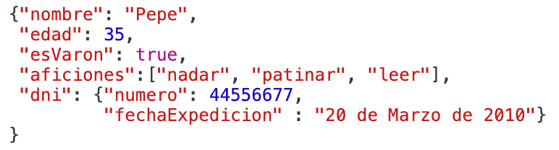

## Peticiones a APIs

Vamos a hacer una petición a una API. Para ello, necesitamos saber:

* El endpoint (url)
* Si necesita parámetros, cuáles son, y dónde se colocan (en el query string o en el cuerpo de la petición)

Un ejemplo de petición a una API vamos a hacerlo con una petición a un API gratuita para ver el cambio de moneda.

Para ello primero debemos darnos de alta de manera **gratuita** en: https://apilayer.com/

Una vez nos demos de alta recibiremos un token para acceder a las APIs publicas que tienen.
En nuestro caso escogemos **Exchange Rates Data API**

In [1]:
import requests # Si no tienes instalado el módulo de requests instalarlo con: pip install requests

In [2]:
# Se define la url de acceso
url = "https://api.apilayer.com/exchangerates_data/latest"

In [3]:
# Se definen los parámetros de la llamada a la API
headers = { "apikey": "gmNRMl9AXQEcd9wQHog7NsvGCKGRU6v4"} # Token de acceso gratuito a la API, 

In [4]:
# Llamamos a la API
response = requests.get(url, headers=headers)

In [5]:
# Código de estado: 200 indica OK
response.status_code

200

In [6]:
# Cabeceras: dan información sobre el servidor, el formato de la respuesta, ...

response.headers

{'Date': 'Wed, 26 Jul 2023 09:14:08 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'CF-Ray': '7ecb87db2ca63676-MAD', 'CF-Cache-Status': 'DYNAMIC', 'Access-Control-Allow-Origin': '*', 'cf-apo-via': 'origin,host', 'RateLimit-Limit': '1000', 'RateLimit-Remaining': '960', 'RateLimit-Reset': '398752', 'X-Cloud-Trace-Context': '5276bcec1b44053fbdf733d2f90ba5ac', 'X-RateLimit-Limit-Day': '1000', 'X-RateLimit-Limit-Month': '1000', 'X-RateLimit-Remaining-Day': '994', 'X-RateLimit-Remaining-Month': '960', 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v3?s=%2B2SvBjIai0Lc29EBpD4lChWCAGPQDThXjXuBBgrFLGFbKGBzqn9t%2B5cSwlANZlW%2BKANUCyXhtjPB6Q5e615ew%2FjiSx0tlHiXpWMqh%2FxhCcf5D8MA8FWWhS8JS2ygJXpnC6M%3D"}],"group":"cf-nel","max_age":604800}', 'NEL': '{"success_fraction":0,"report_to":"cf-nel","max_age":604800}', 'Vary': 'Accept-Encoding', 'Server': 'cloudflare', 'Content-Encoding': 'br', 'alt-svc': 'h3=":443"; ma=

In [7]:
# Los datos de respuesta, en JSON
response_data = response.json()
response_data

{'success': True,
 'timestamp': 1690362843,
 'base': 'EUR',
 'date': '2023-07-26',
 'rates': {'AED': 4.067001,
  'AFN': 94.975575,
  'ALL': 101.699497,
  'AMD': 428.555237,
  'ANG': 1.995514,
  'AOA': 913.145465,
  'ARS': 300.760028,
  'AUD': 1.638472,
  'AWG': 1.994464,
  'AZN': 1.881354,
  'BAM': 1.960628,
  'BBD': 2.235605,
  'BDT': 120.165886,
  'BGN': 1.955764,
  'BHD': 0.417384,
  'BIF': 3134.259987,
  'BMD': 1.107266,
  'BND': 1.471523,
  'BOB': 7.650839,
  'BRL': 5.260511,
  'BSD': 1.107236,
  'BTC': 3.7913078e-05,
  'BTN': 90.576528,
  'BWP': 14.454461,
  'BYN': 2.794782,
  'BYR': 21702.422145,
  'BZD': 2.231896,
  'CAD': 1.461963,
  'CDF': 2751.55729,
  'CHF': 0.955266,
  'CLF': 0.033244,
  'CLP': 917.303954,
  'CNY': 7.919611,
  'COP': 4385.70519,
  'CRC': 593.071039,
  'CUC': 1.107266,
  'CUP': 29.342561,
  'CVE': 110.537177,
  'CZK': 24.074625,
  'DJF': 197.145434,
  'DKK': 7.451126,
  'DOP': 62.043611,
  'DZD': 149.432234,
  'EGP': 34.270447,
  'ERN': 16.608997,
  'ETB': 

La librería parsea el JSON de respuesta automáticamente a una lista de diccionarios (con las anidaciones correspondientes). P.e. podemos extraer campos concretos de esta forma:

In [8]:
response_data['base']

'EUR'

In [9]:
response_data['rates']['AUD']

1.638472

In [10]:
response_data['rates']['USD']

1.107266

In [11]:
response_data["date"]

'2023-07-26'

## Códigos de respuesta

El _status code_ nos indica si ha ido bien o no la petición. Además, en caso de error, nos da información sobre la causa de este. Los más utilizados son:

* 200: la petición ha ido bien
* 301: el servidor está redireccionando la petición a otro
* 401: error de autenticación
* 400: la petición es incorrecta (p.e. porque falta algún parámetro o están mal formados)
* 403: prohibido, no tienes permisos suficientes
* 404: el recurso consultado no existe
* 500: el servidor ha dado un error inesperado

Puedes ver la lista completa [aquí](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)

## Verbos

Las peticiones a las APIs usan verbos. En el ejemplo de antes, hemos utilizado `GET`. Además, este verbo es el que se usa por defecto a través del explorador.

Los más comunes y el uso que se les suele dar son:

* GET: para consulta
* POST: para insertar un nuevo dato o disparar una acción
* PUT: para actualizar un registro
* DELETE: para eliminar un registro

## Parámetros

Los parámetros que incluimos en la petición pueden ir de formas diversas:

* Como parte de la URL. P.e. `https://api.exchangeratesapi.io/2010-04-01`
* Como parte del query string. La URL y su query string se separan con el símbolo `?`, y tienen la forma `clave=valor`. P.e. `https://api.exchangeratesapi.io/latest?base=USD`. Este es el lugar habitual de los parámetros en las peticiones `GET`.
* En el cuerpo de la petición. Es el lugar habitual de los parámetros en las peticiones `POST` y `PUT`.

Un ejemplo de petición `POST` con parámetros en el cuerpo de la petición:

In [12]:
response = requests.post('https://httpbin.org/post', data={'clave': 'valor'})
response.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'clave': 'valor'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br',
  'Content-Length': '11',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.28.1',
  'X-Amzn-Trace-Id': 'Root=1-64c0e4fb-3dbe0b534298be65460724a5'},
 'json': None,
 'origin': '88.27.21.61',
 'url': 'https://httpbin.org/post'}

Un ejemplo similar, pero enviando los parámetros en el cuerpo de la petición __en formato JSON__:

In [13]:
response = requests.post('https://httpbin.org/post', json={'clave': 'valor'})
response.json()

{'args': {},
 'data': '{"clave": "valor"}',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br',
  'Content-Length': '18',
  'Content-Type': 'application/json',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.28.1',
  'X-Amzn-Trace-Id': 'Root=1-64c0e529-0a21512577c178b215cdf7c0'},
 'json': {'clave': 'valor'},
 'origin': '88.27.21.61',
 'url': 'https://httpbin.org/post'}